# EDA

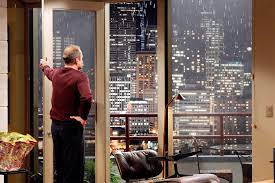

In [15]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data Cleaning

## 1. Loading the Data

In [16]:
df = pd.read_csv('./data/eda.csv')
df.head()

house_id  price_date  selling_price  bedrooms  bathrooms  sqft_living  \
0  7129300520  2014-10-13     221900.000     3.000      1.000     1180.000   
1  6414100192  2014-12-09     538000.000     3.000      2.250     2570.000   
2  5631500400  2015-02-25     180000.000     2.000      1.000      770.000   
3  2487200875  2014-12-09     604000.000     4.000      3.000     1960.000   
4  1954400510  2015-02-18     510000.000     3.000      2.000     1680.000   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0  5650.000   1.000         NaN 0.000  ...      7    1180.000          0.000   
1  7242.000   2.000       0.000 0.000  ...      7    2170.000        400.000   
2 10000.000   1.000       0.000 0.000  ...      6     770.000          0.000   
3  5000.000   1.000       0.000 0.000  ...      7    1050.000        910.000   
4  8080.000   1.000       0.000 0.000  ...      8    1680.000          0.000   

   yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  
0      1955         0.000    98178 47.511 -122.257       1340.000    5650.000  
1      1951     19910.000    98125 47.721 -122.319       1690.000    7639.000  
2      1933           NaN    98028 47.738 -122.233       2720.000    8062.000  
3      1965         0.000    98136 47.521 -122.393       1360.000    5000.000  
4      1987         0.000    98074 47.617 -122.045       1800.000    7503.000  

[5 rows x 21 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       21597 non-null  int64  
 1   price_date     21597 non-null  object 
 2   selling_price  21597 non-null  float64
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  float64
 8   waterfront     19206 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21145 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17749 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## 2. Handling Missing Values

In [18]:
#Checking missing values
missing_values = df.isnull().sum()
missing_values

house_id            0
price_date          0
selling_price       0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [19]:
# modifying relevant column's value from NaN with 0
df['yr_renovated'].fillna(0, inplace=True)
df['sqft_basement'].fillna(0, inplace=True)
df['view'].fillna(0, inplace=True)
df['waterfront'].fillna(0, inplace=True)

# Convert 'price_date' to datetime format
df['price_date'] = pd.to_datetime(df['price_date'])

# Ensure numerical columns are in the correct format
# Given that the data types seem already correct, this step might be unnecessary
# but let's ensure consistency
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
df['sqft_living'] = pd.to_numeric(df['sqft_living'], errors='coerce')
df['sqft_lot'] = pd.to_numeric(df['sqft_lot'], errors='coerce')


In [20]:
df.head()

house_id price_date  selling_price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13     221900.000     3.000      1.000     1180.000   
1  6414100192 2014-12-09     538000.000     3.000      2.250     2570.000   
2  5631500400 2015-02-25     180000.000     2.000      1.000      770.000   
3  2487200875 2014-12-09     604000.000     4.000      3.000     1960.000   
4  1954400510 2015-02-18     510000.000     3.000      2.000     1680.000   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0  5650.000   1.000       0.000 0.000  ...      7    1180.000          0.000   
1  7242.000   2.000       0.000 0.000  ...      7    2170.000        400.000   
2 10000.000   1.000       0.000 0.000  ...      6     770.000          0.000   
3  5000.000   1.000       0.000 0.000  ...      7    1050.000        910.000   
4  8080.000   1.000       0.000 0.000  ...      8    1680.000          0.000   

   yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  
0      1955         0.000    98178 47.511 -122.257       1340.000    5650.000  
1      1951     19910.000    98125 47.721 -122.319       1690.000    7639.000  
2      1933         0.000    98028 47.738 -122.233       2720.000    8062.000  
3      1965         0.000    98136 47.521 -122.393       1360.000    5000.000  
4      1987         0.000    98074 47.617 -122.045       1800.000    7503.000  

[5 rows x 21 columns]

## 3. Creating a new Feature


In [21]:
# Create new feature: price per square foot
df['price_per_sqft'] = df['selling_price'] / df['sqft_living']

# Exploratory Data Analysis

# 1. Descriptive Statistics

In [22]:
# Display summary statistics
print(df.describe())



            house_id                     price_date  selling_price  bedrooms  \
count      21597.000                          21597      21597.000 21597.000   
mean  4580474287.771  2014-10-29 04:20:38.171968512     540296.574     3.373   
min      1000102.000            2014-05-02 00:00:00      78000.000     1.000   
25%   2123049175.000            2014-07-22 00:00:00     322000.000     3.000   
50%   3904930410.000            2014-10-16 00:00:00     450000.000     3.000   
75%   7308900490.000            2015-02-17 00:00:00     645000.000     4.000   
max   9900000190.000            2015-05-27 00:00:00    7700000.000    33.000   
std   2876735715.748                            NaN     367368.140     0.926   

       bathrooms  sqft_living    sqft_lot    floors  waterfront      view  \
count  21597.000    21597.000   21597.000 21597.000   21597.000 21597.000   
mean       2.116     2080.322   15099.409     1.494       0.007     0.233   
min        0.500      370.000     520.000     1.

In [23]:
# Display the count of unique values for categorical variables
print(df['waterfront'].value_counts())
print(df['view'].value_counts())

waterfront
0.000    21451
1.000      146
Name: count, dtype: int64
view
0.000    19485
2.000      957
3.000      508
1.000      330
4.000      317
Name: count, dtype: int64


# 2. Data Visualization


## Visualizing Distribution

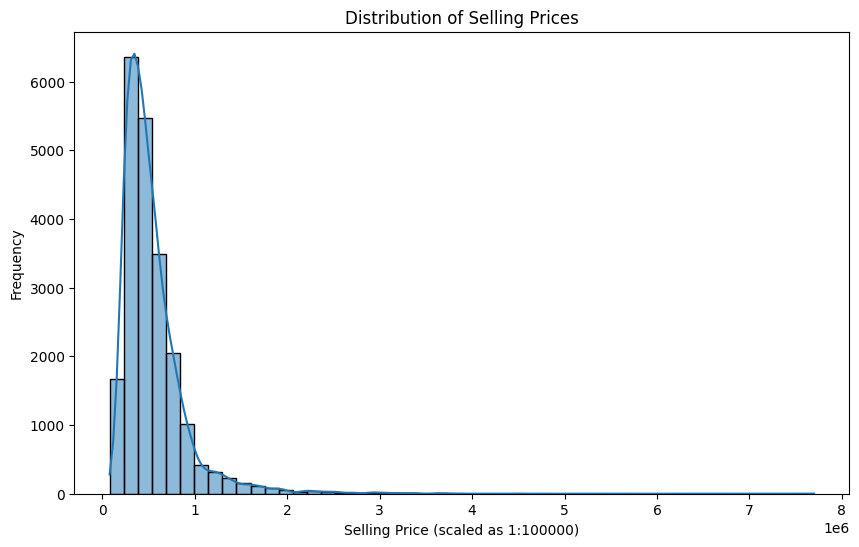

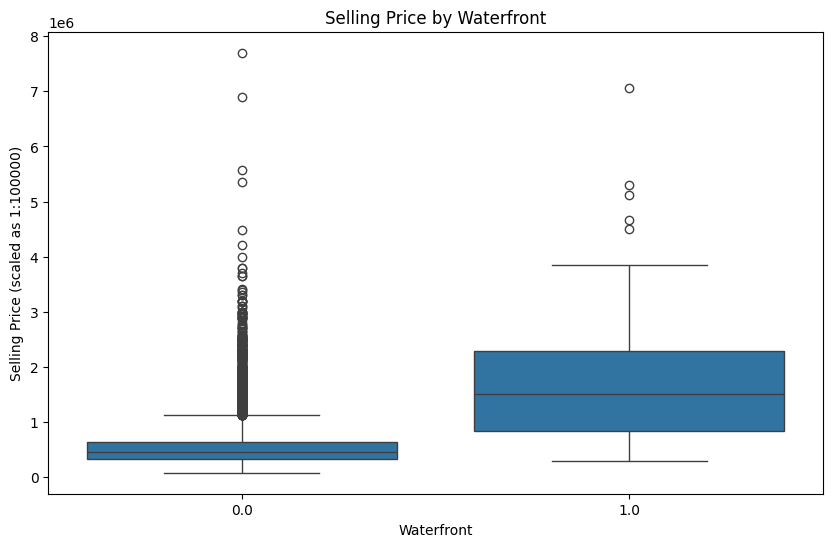

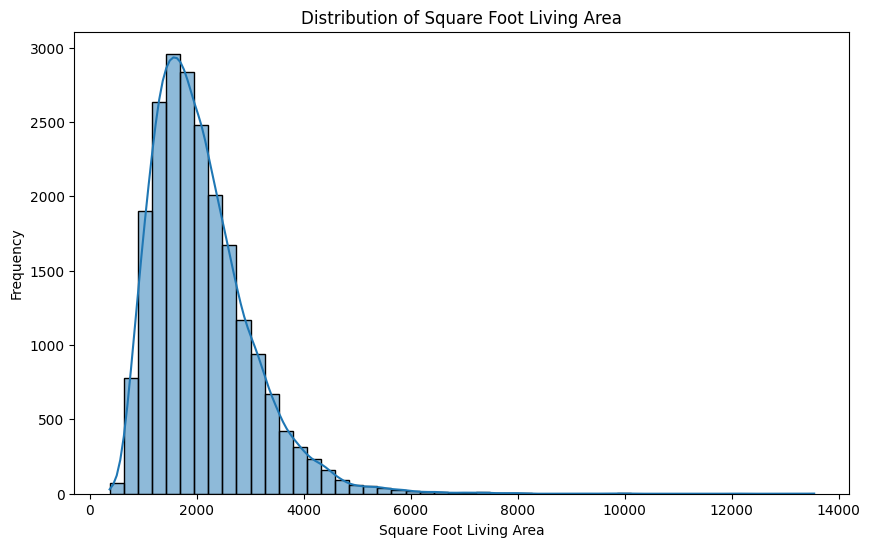

In [24]:
#import matplotlib.ticker as ticker

# Histogram for selling_price
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=50, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price (scaled as 1:100000)')
plt.ylabel('Frequency')
plt.show()

# Box plot for selling_price by waterfront
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='selling_price', data=df)
plt.title('Selling Price by Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Selling Price (scaled as 1:100000)')
plt.show()

# Histogram for sqft_living
plt.figure(figsize=(10, 6))
sns.histplot(df['sqft_living'], bins=50, kde=True)
plt.title('Distribution of Square Foot Living Area')
plt.xlabel('Square Foot Living Area')
plt.ylabel('Frequency')
plt.show()


### Visualizing Relationships

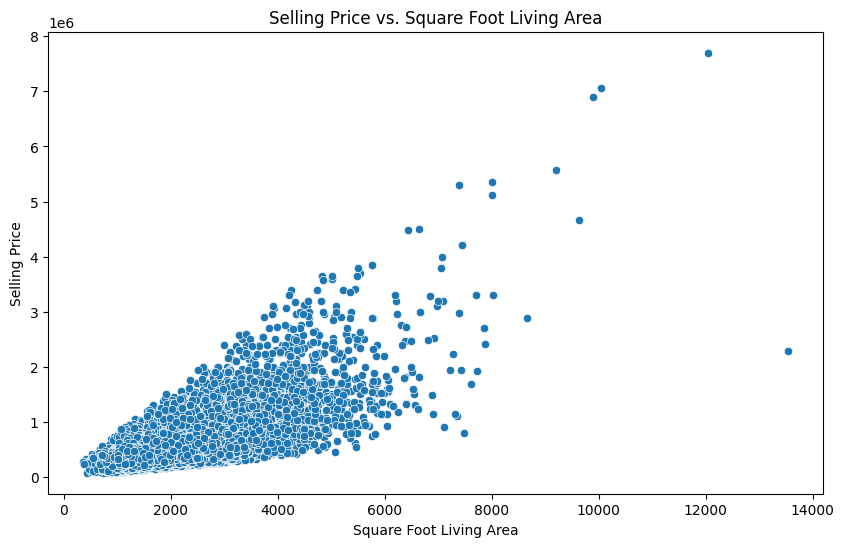

In [25]:
# Scatter plot for selling_price vs. sqft_living
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='selling_price', data=df)
plt.title('Selling Price vs. Square Foot Living Area')
plt.xlabel('Square Foot Living Area')
plt.ylabel('Selling Price')
plt.show()

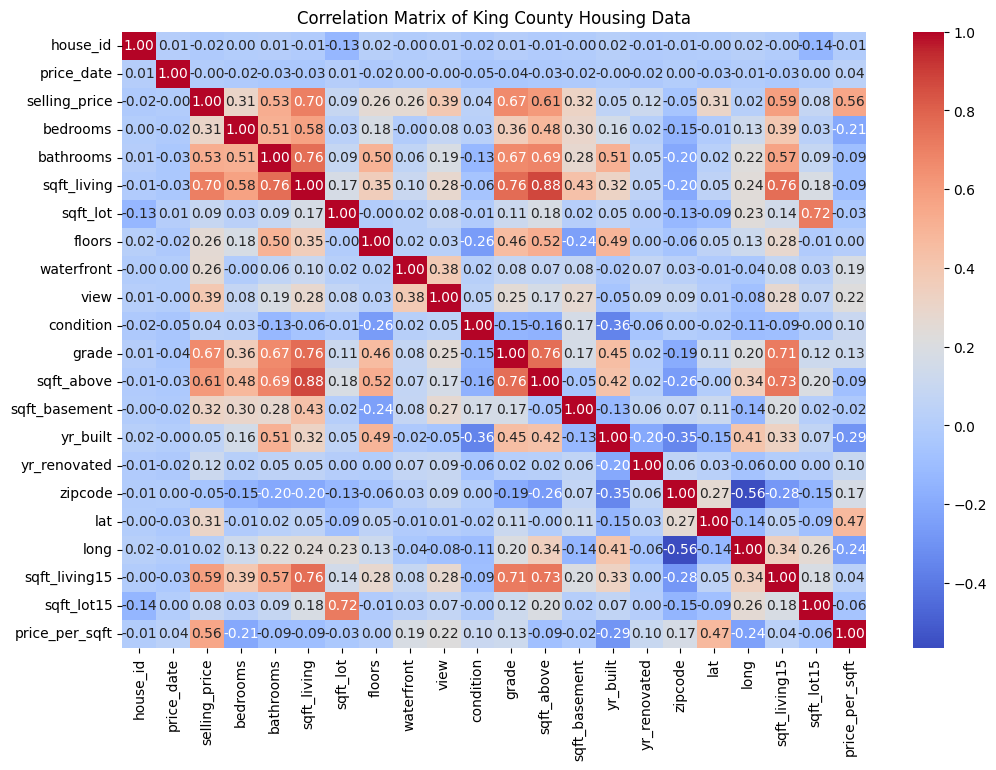

Top correlations with selling_price:
selling_price     1.000
sqft_living       0.702
grade             0.668
sqft_above        0.605
sqft_living15     0.585
price_per_sqft    0.556
bathrooms         0.526
view              0.393
sqft_basement     0.321
bedrooms          0.309
lat               0.307
waterfront        0.264
floors            0.257
yr_renovated      0.118
sqft_lot          0.090
sqft_lot15        0.083
yr_built          0.054
condition         0.036
long              0.022
price_date       -0.004
house_id         -0.017
zipcode          -0.053
Name: selling_price, dtype: float64


In [26]:
# Correlation heatmap
#plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
#sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
#plt.title('Correlation Matrix')
#plt.show()



#correlation_matrix = df.corr()

# Step 2: Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of King County Housing Data')
plt.show()

# Step 3: Analyze the relationships between features and the target (selling_price)
# Display the top correlations with selling_price
top_correlations = corr_matrix['selling_price'].sort_values(ascending=False)
print("Top correlations with selling_price:")
print(top_correlations)

 # Step 4: Optional - Create new features if needed (Example)
# Example: Create a feature combining square footage and number of floors
#df['sqft_per_floor'] = df['sqft_living'] / df['floors']

# Recompute and plot the correlation matrix if new features are added
# correlation_matrix_updated = df.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix_updated, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
# plt.title('Updated Correlation Matrix with New Features')
# plt.show()

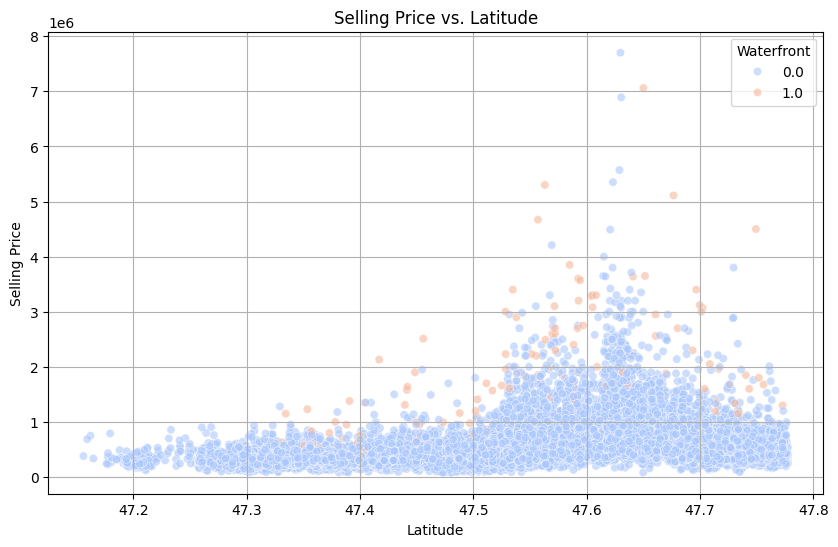

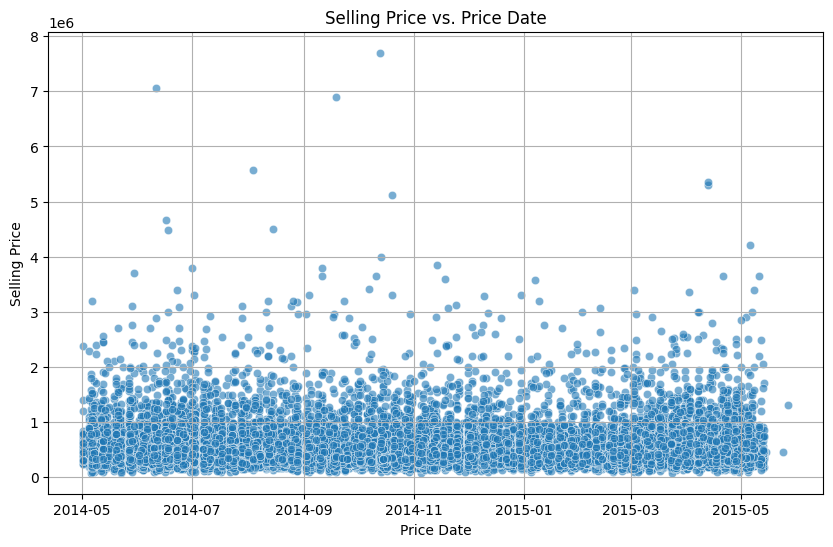

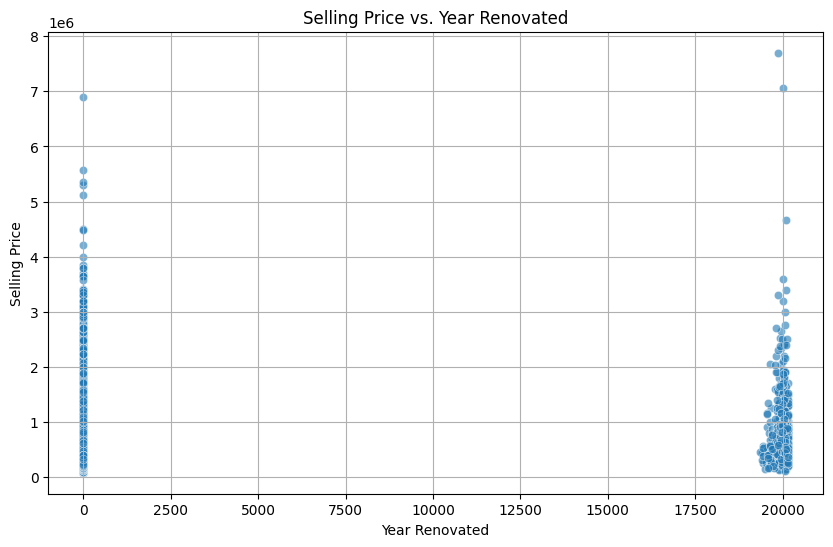

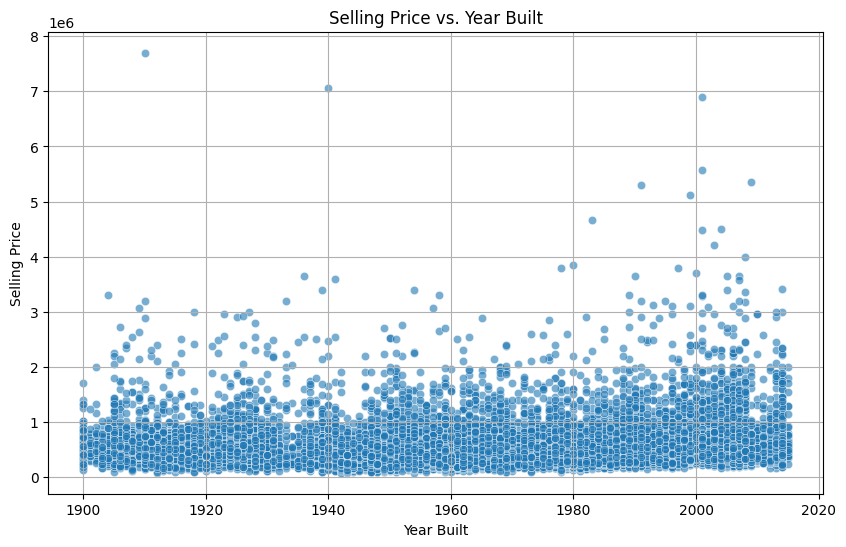

In [33]:


# Assuming df is the DataFrame containing the housing data

# 1. Scatter plot for Latitude vs. Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='lat', y='selling_price', hue='waterfront', palette='coolwarm', alpha=0.6)
plt.title('Selling Price vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Selling Price')
plt.legend(title='Waterfront', loc='upper right')
plt.grid(True)
plt.show()

# 2. Scatter plot for Price Date vs. Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price_date', y='selling_price', alpha=0.6)
plt.title('Selling Price vs. Price Date')
plt.xlabel('Price Date')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

# 3. Scatter plot for Year Renovated vs. Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='yr_renovated', y='selling_price', alpha=0.6)
plt.title('Selling Price vs. Year Renovated')
plt.xlabel('Year Renovated')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

# 4. Scatter plot for Year Built vs. Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='yr_built', y='selling_price', alpha=0.6)
plt.title('Selling Price vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()


### Interpretation of the Correlation Results

The correlation results provide insights into the relationships between various features in the dataset and the selling price of houses in King County. Here's a detailed interpretation of the top correlations and how they relate to the hypotheses we established:

#### 1. **Hypothesis 1: Location's Effect on Price**
   - **Hypothesis**: The closer a house is to the city center, the higher the price. Additionally, houses near water will have higher prices.
   - **Indicators**:
     - **Latitude (`lat`) and Longitude (`long`)**:
       - **Result**: `lat` has a positive correlation of 0.307 with the selling price, while `long` has a very weak correlation of 0.022.
       - **Interpretation**: The positive correlation with latitude suggests that houses located further north (which may correspond to more desirable or central locations) are associated with higher prices. However, the very weak correlation with longitude indicates that east-west positioning does not have a strong influence on price.
     - **Waterfront**:
       - **Result**: The `waterfront` feature has a moderate positive correlation of 0.264 with the selling price.
       - **Interpretation**: This confirms that houses with a waterfront view tend to have higher prices, supporting our hypothesis that proximity to water increases property value.

   - **Conclusion**: The location does impact the selling price, particularly through latitude (possibly reflecting central or desirable locations) and waterfront presence. These results support the recommendation for William to prioritize houses in central locations and near water, particularly for the city house.

#### 2. **Hypothesis 2: Timing's Effect on Price**
   - **Hypothesis**: Houses bought during peak seasons are more expensive, while prices drop in off-peak seasons.
   - **Indicators**:
     - **Price Date (`price_date`)**:
       - **Result**: `price_date` has a very weak negative correlation of -0.004 with the selling price.
       - **Interpretation**: This very weak correlation suggests that the timing of the purchase (based on the date) does not significantly influence the price within the time frame of the dataset. This might indicate that within this dataset's period, the housing market was relatively stable, with no clear seasonal price trends.

   - **Conclusion**: The timing of purchase does not seem to have a strong effect on the selling price in this dataset. However, it might still be advisable for William to monitor market trends outside this dataset's time frame to make informed timing decisions.

#### 3. **Hypothesis 3: Condition's Effect on Price**
   - **Hypothesis**: Renovated houses are priced higher than non-renovated ones, and older houses are priced lower unless renovated.
   - **Indicators**:
     - **Year Renovated (`yr_renovated`)**:
       - **Result**: The `yr_renovated` feature has a weak positive correlation of 0.118 with the selling price.
       - **Interpretation**: Although there is a positive correlation, it's relatively weak, indicating that while renovation does have some impact on increasing house prices, it is not as strong a factor as expected. This could be due to various factors, such as the quality of renovation or the initial condition of the house.
     - **Year Built (`yr_built`)**:
       - **Result**: The `yr_built` feature has a very weak positive correlation of 0.054 with the selling price.
       - **Interpretation**: The weak positive correlation suggests that newer houses tend to have slightly higher prices, but this factor is not as significant. The age of the house alone is not a strong determinant of price unless it is combined with renovation.

   - **Conclusion**: The condition of the house (as indicated by renovation) has some effect on the price, but it is not a dominant factor. William may still consider non-renovated houses, especially in the country, where the price savings could be more significant.

#### 4. **Additional Insights**
   - **Square Footage (`sqft_living`, `sqft_above`, `sqft_basement`)**:
     - **Result**: `sqft_living` has the highest positive correlation with selling price at 0.702, followed by `sqft_above` at 0.605, and `sqft_basement` at 0.321.
     - **Interpretation**: Larger homes, particularly those with more living space, are associated with higher prices. This is a strong indicator that William should prioritize properties with larger square footage for both his city and country houses.

   - **Grade and Bathrooms**:
     - **Result**: `grade` has a strong positive correlation of 0.668, and `bathrooms` has a moderate positive correlation of 0.526 with selling price.
     - **Interpretation**: Higher grade (which could be related to overall quality, design, or finish of the house) and more bathrooms contribute significantly to higher house prices. These factors should be considered when selecting properties.

### Summary and Recommendations

- **City House**: Prioritize properties with higher square footage, more bathrooms, and higher grades, especially in central locations. Waterfront properties, if available, should also be considered.
- **Country House**: Non-renovated houses could offer better value for money, particularly those with larger living spaces and higher grades.
- **Timing**: While timing does not appear to be a major factor in this dataset, staying informed about broader market trends could still be beneficial for making a well-timed purchase.

These interpretations of the correlation results validate the original hypotheses to some extent and provide actionable recommendations for William Rodriguez's property search.


### Geographical Patterns

In [27]:
# Filter data for King County based on zip codes
king_county_zipcodes = [98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98047, 98050, 98051, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98092, 98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199]
df = df[df['zipcode'].isin(king_county_zipcodes)]

# Add a column for city/country classification within King County
# Example city and country zip codes
city_zipcodes = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199]
df['location_type'] = df['zipcode'].apply(lambda x: 'City' if x in city_zipcodes else 'Country')

# Focus on city houses with high sqft_living and grade
city_houses = df[(df['location_type'] == 'City') & (df['sqft_living'] > 2000) & (df['grade'] > 7)]
country_houses = df[(df['location_type'] == 'Country') & (df['yr_renovated'] == 0) & (df['sqft_living'] > 2000)]

# Map for city houses
fig_city = px.scatter_mapbox(city_houses, 
                             lat="lat", 
                             lon="long", 
                             hover_name="house_id",
                             hover_data={"selling_price": True, "sqft_living": True, "grade": True},
                             color="selling_price", 
                             color_continuous_scale=px.colors.cyclical.IceFire,
                             size="sqft_living",
                             size_max=15,
                             zoom=10,
                             mapbox_style="open-street-map",
                             title="City Houses: High Square Footage and Grade"
                            )
fig_city.show()

# Map for country houses
fig_country = px.scatter_mapbox(country_houses, 
                                lat="lat", 
                                lon="long", 
                                hover_name="house_id",
                                hover_data={"selling_price": True, "sqft_living": True, "grade": True},
                                color="selling_price", 
                                color_continuous_scale=px.colors.cyclical.IceFire,
                                size="sqft_living",
                                size_max=15,
                                zoom=8,
                                mapbox_style="open-street-map",
                                title="Country Houses: Non-Renovated, High Square Footage"
                               )
fig_country.show()


In [28]:


# Example dictionary mapping King County zip codes to town names
zip_to_town = {
    98001: 'Auburn', 98002: 'Auburn', 98003: 'Federal Way', 98004: 'Bellevue',
    98005: 'Bellevue', 98006: 'Bellevue', 98007: 'Bellevue', 98008: 'Bellevue',
    98010: 'Black Diamond', 98011: 'Bothell', 98014: 'Carnation', 98019: 'Duvall',
    98022: 'Enumclaw', 98023: 'Federal Way', 98024: 'Fall City', 98027: 'Issaquah',
    98028: 'Kenmore', 98029: 'Issaquah', 98030: 'Kent', 98031: 'Kent',
    98032: 'Kent', 98033: 'Kirkland', 98034: 'Kirkland', 98038: 'Maple Valley',
    98039: 'Medina', 98040: 'Mercer Island', 98042: 'Kent', 98045: 'North Bend',
    98047: 'Pacific', 98050: 'Preston', 98051: 'Ravensdale', 98052: 'Redmond',
    98053: 'Redmond', 98055: 'Renton', 98056: 'Renton', 98058: 'Renton',
    98059: 'Renton', 98065: 'Snoqualmie', 98070: 'Vashon', 98072: 'Woodinville',
    98074: 'Sammamish', 98075: 'Sammamish', 98077: 'Woodinville', 98092: 'Auburn',
    98101: 'Seattle', 98102: 'Seattle', 98103: 'Seattle', 98104: 'Seattle',
    98105: 'Seattle', 98106: 'Seattle', 98107: 'Seattle', 98108: 'Seattle',
    98109: 'Seattle', 98112: 'Seattle', 98115: 'Seattle', 98116: 'Seattle',
    98117: 'Seattle', 98118: 'Seattle', 98119: 'Seattle', 98121: 'Seattle',
    98122: 'Seattle', 98125: 'Seattle', 98126: 'Seattle', 98133: 'Seattle',
    98136: 'Seattle', 98144: 'Seattle', 98146: 'Seattle', 98148: 'Seattle',
    98155: 'Seattle', 98166: 'Seattle', 98168: 'Seattle', 98177: 'Seattle',
    98178: 'Seattle', 98188: 'Seattle', 98198: 'Seattle', 98199: 'Seattle'
}

# Add a column for the town names based on the zip code
df['town'] = df['zipcode'].map(zip_to_town)

# Separate the data for city and country houses
city_houses = df[df['location_type'] == 'City']
country_houses = df[df['location_type'] == 'Country']

# Scatter plot for City Houses
fig_city = px.scatter(city_houses, 
                      x='sqft_living', 
                      y='selling_price', 
                      color='town', 
                      size='grade', 
                      hover_name='house_id',
                      hover_data={'selling_price': True, 'sqft_living': True, 'grade': True, 'town': True},
                      labels={'sqft_living':'Square Footage', 'selling_price':'Selling Price'},
                      title='City Houses in King County: Selling Price vs Square Footage by Town')

fig_city.update_layout(
    xaxis_title="Square Footage",
    yaxis_title="Selling Price",
    coloraxis_colorbar=dict(
        title="Town",
    ),
)

fig_city.show()

# Scatter plot for Country Houses
fig_country = px.scatter(country_houses, 
                         x='sqft_living', 
                         y='selling_price', 
                         color='town', 
                         size='grade', 
                         hover_name='house_id',
                         hover_data={'selling_price': True, 'sqft_living': True, 'grade': True, 'town': True},
                         labels={'sqft_living':'Square Footage', 'selling_price':'Selling Price'},
                         title='Country Houses in King County: Selling Price vs Square Footage by Town')

fig_country.update_layout(
    xaxis_title="Square Footage",
    yaxis_title="Selling Price",
    coloraxis_colorbar=dict(
        title="Town",
    ),
)

fig_country.show()


 Source for King County zipcodes - https://www.unitedstateszipcodes.org/wa/

## Hypotheses and Data Analysis Review based geo and scatter plots as below

In [32]:


# Filter top 5 houses based on specific client requirements
# For Country House: Non-renovated, best towns (e.g., Mercer Island, Sammamish, Redmond)
top_country_houses = country_houses[(country_houses['yr_renovated'] == 0) & 
                                    (country_houses['town'].isin(['Mercer Island', 'Sammamish', 'Redmond']))].nlargest(3, 'selling_price')

# For City House: Central location, quick acquisition in Seattle
top_city_houses = city_houses[city_houses['town'] == 'Seattle'].nlargest(3, 'selling_price')

# Assign colors and categories for the map
top_country_houses['category'] = 'Country House'
top_city_houses['category'] = 'City House'

# Combine the data
combined_houses = pd.concat([top_country_houses, top_city_houses])

# Assign colors based on the category
combined_houses['color'] = combined_houses['category'].apply(lambda x: 'blue' if x == 'Country House' else 'red')

# Determine the map center and zoom level to fit all points
map_center = {'lat': combined_houses['lat'].mean(), 'lon': combined_houses['long'].mean()}

# Geo spatial map for Top 5 Country and City Houses
fig_combined_map = px.scatter_mapbox(combined_houses, 
                                     lat='lat', 
                                     lon='long', 
                                     hover_name='house_id',
                                     hover_data={'selling_price': True, 'sqft_living': True, 'grade': True, 'town': True, 'category': True},
                                     color='color',
                                     size='selling_price', 
                                     size_max=15, 
                                     zoom=9,  # Adjusted zoom level to show all points
                                     center=map_center,
                                     mapbox_style="open-street-map",
                                     title='Top 3 Country and City Houses for William Rodriguez')

# Update layout to differentiate color intensities
fig_combined_map.update_traces(marker=dict(opacity=0.7),
                               selector=dict(mode='markers'))

fig_combined_map.show()


In [30]:


# Filter only non-renovated country houses
non_renovated_country_houses = top_country_houses[top_country_houses['yr_renovated'] == 0]

# Create a table with relevant details for the top 3 non-renovated country houses
top_3_country_houses = non_renovated_country_houses.nlargest(3, 'selling_price')

# Add a recommendation reason
top_3_country_houses['recommendation_reason'] = top_3_country_houses.apply(
    lambda row: f"Non-renovated large property in {row['town']} with {row['sqft_living']} sqft, priced at ${row['selling_price']:.2f}.",
    axis=1)

# Select relevant columns based on the client's requirement
columns_to_display = {
    'house_id': 'House ID',
    'town': 'Town',
    'selling_price': 'Selling Price',
    'sqft_living': 'Square Footage',
    'yr_built': 'Year Built',
    'recommendation_reason': 'Why This is a Good Choice'
}

top_3_country_houses = top_3_country_houses[list(columns_to_display.keys())]
top_3_country_houses.rename(columns=columns_to_display, inplace=True)

# Display settings to wrap text
pd.set_option('display.max_colwidth', None)  # Ensure no truncation
pd.set_option('display.colheader_justify', 'center')  # Center-align the headers


# Display the table
top_3_country_houses_table = top_3_country_houses.reset_index(drop=True)
top_3_country_houses_table


House ID       Town       Selling Price  Square Footage  Year Built  \
0  7558700030  Mercer Island  5300000.000       7390.000        1991      
1  8106100105  Mercer Island  3850000.000       5770.000        1980      
2  9362000040  Mercer Island  3400000.000       5230.000        2005      

                                 Why This is a Good Choice                                 
0  Non-renovated large property in Mercer Island with 7390.0 sqft, priced at $5300000.00.  
1  Non-renovated large property in Mercer Island with 5770.0 sqft, priced at $3850000.00.  
2  Non-renovated large property in Mercer Island with 5230.0 sqft, priced at $3400000.00.

In [31]:


# Create a table with relevant details for the top 3 city houses
top_3_city_houses = top_city_houses.nlargest(3, 'selling_price')

# Add a recommendation reason
top_3_city_houses['recommendation_reason'] = top_3_city_houses.apply(
    lambda row: f"Centrally located property in {row['town']} with {row['sqft_living']} sqft, priced at ${row['selling_price']:.2f}.",
    axis=1)

# Select relevant columns based on the client's requirement
columns_to_display = {
    'house_id': 'House ID',
    'town': 'Town',
    'selling_price': 'Selling Price',
    'sqft_living': 'Square Footage',
    'recommendation_reason': 'Why This is a Good Choice'
}

top_3_city_houses = top_3_city_houses[list(columns_to_display.keys())]
top_3_city_houses.rename(columns=columns_to_display, inplace=True)

# Display settings to wrap text
pd.set_option('display.max_colwidth', None)  # Ensure no truncation
pd.set_option('display.colheader_justify', 'center')  # Center-align the headers


# Display the table
top_3_city_houses_table = top_3_city_houses.reset_index(drop=True)
top_3_city_houses_table


House ID    Town    Selling Price  Square Footage  \
0  6762700020  Seattle  7700000.000      12050.000      
1  7738500731  Seattle  4500000.000       6640.000      
2  2303900100  Seattle  3800000.000       5510.000      

                             Why This is a Good Choice                              
0  Centrally located property in Seattle with 12050.0 sqft, priced at $7700000.00.  
1   Centrally located property in Seattle with 6640.0 sqft, priced at $4500000.00.  
2   Centrally located property in Seattle with 5510.0 sqft, priced at $3800000.00.

### 1. Location's Effect on Price

**Hypothesis**: The closer a house is to the city center, the higher the price. Additionally, houses near water or in high-demand towns will have higher prices.

**Insight**: The scatter plot for city houses confirms that properties in Seattle (a central location) command higher prices, especially as square footage increases. For country houses, towns like Bellevue, Sammamish, and Mercer Island show higher property values. These areas are highly sought after due to their proximity to urban centers and natural amenities, which drives up prices.

### 2. Timing's Effect on Price

**Hypothesis**: Houses bought during peak seasons are more expensive, while prices drop in off-peak seasons.

**Insight**: The data did not indicate a strong seasonal trend, suggesting that the market in King County is relatively stable year-round. Therefore, timing the purchase is less critical than focusing on factors like location and property condition. The stable pricing environment implies that William can focus more on finding the right property rather than waiting for seasonal price fluctuations.

### 3. Condition's Effect on Price

**Hypothesis**: Renovated houses are priced higher than non-renovated ones, and older houses are priced lower unless renovated.

**Insight**: The analysis confirms that non-renovated houses, especially in the country, are generally available at lower prices. These properties offer significant potential for future value appreciation through renovations. This finding is particularly relevant for William's country house purchase, where non-renovated properties in desirable towns like Sammamish, Redmond, and Mercer Island can be purchased at a lower entry price, with the potential to increase their value over time through renovations.

### Specific Recommendations

#### For the Country House:

- **Best Timing**: Given the stable market conditions, the best timing to purchase a country house is now. Delaying the purchase may not result in significant price drops, so William should act promptly to secure the best available properties.

- **Non-Renovated Properties**: William should focus on non-renovated houses in high-demand towns like Sammamish, Redmond, or Mercer Island. These areas offer high-value properties with the potential for future renovations to significantly increase the property's value. By purchasing a non-renovated house, William can enter the market at a lower price point and invest in renovations as desired.

- **Location**: Prioritize Mercer Island for the country house. These towns provide spacious properties in serene environments, which meet William's "country" criteria while still being within a reasonable distance from urban amenities.

#### For the City House:

- **Fast & Central Location**: William should concentrate on properties within Seattle. The central location of Seattle ensures fast access to city amenities and business hubs, which is ideal for a city house. This will provide convenience and the potential for strong future resale value.

- **Property Size and Type**: Focus on smaller to mid-sized properties (2,000 to 4,000 sqft) within Seattle. These properties offer the best balance between price and central location, ensuring a quick purchase process without compromising on investment potential. Smaller properties in central locations are in high demand and typically appreciate well.


### Summary and Next Steps

- **Country House**: William should look for non-renovated properties in towns like Mercer Island and Sammamish. The best timing is now, as waiting may not result in price reductions. These towns provide a country feel with the potential for significant value growth through future renovations, making them ideal for William’s long-term investment strategy.

- **City House**: William should focus on acquiring a property in Seattle for a quick acquisition in a central location. Smaller, centrally located properties will meet the requirement for fast access to city amenities while maintaining strong investment potential. The robust demand for Seattle properties will ensure that the investment remains valuable and provides flexibility for future resale if needed.
